<a href="https://colab.research.google.com/github/HromovAndrey/II_mood_2_part-_4_lesson/blob/Labs/%D0%9F%D1%80%D0%B0%D0%BA%D1%82%D0%B8%D1%87%D0%BD%D0%B0_%D0%B0%D0%BD%D0%B0%D0%BB%D1%96%D0%B7_%D0%B4%D0%B0%D0%BD%D0%B8%D1%852.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [123]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [124]:
df = pd.read_csv("https://raw.githubusercontent.com/HalyshAnton/IT-Step-Pyton-AI/main/module2/data/weatherHistory.csv")

In [125]:
df.head()

,Formatted Date,Summary,Precip Type,Temperature (C),Apparent Temperature (C),Humidity,Wind Speed (km/h),Wind Bearing (degrees),Visibility (km),Loud Cover,Pressure (millibars),Daily Summary
0,2006-04-01 00:00:00.000 +0200,Partly Cloudy,rain,9.472222,7.388889,0.89,14.1197,251.0,15.8263,0.0,1015.13,Partly cloudy throughout the day.
1,2006-04-01 01:00:00.000 +0200,Partly Cloudy,rain,9.355556,7.227778,0.86,14.2646,259.0,15.8263,0.0,1015.63,Partly cloudy throughout the day.
2,2006-04-01 02:00:00.000 +0200,Mostly Cloudy,rain,9.377778,9.377778,0.89,3.9284,204.0,14.9569,0.0,1015.94,Partly cloudy throughout the day.
3,2006-04-01 03:00:00.000 +0200,Partly Cloudy,rain,8.288889,5.944444,0.83,14.1036,269.0,15.8263,0.0,1016.41,Partly cloudy throughout the day.
4,2006-04-01 04:00:00.000 +0200,Mostly Cloudy,rain,8.755556,6.977778,0.83,11.0446,259.0,15.8263,0.0,1016.51,Partly cloudy throughout the day.


# Завдання 1
Виведіть основні числові характеристики для числових ознак. Що потрібно зробити з стовпчиком `Loud Cover`?

In [126]:
print(df['Loud Cover'].unique())

if df['Loud Cover'].nunique() == 1:
    df = df.drop(columns=['Loud Cover'])

print(df.head())



[0.]
                  Formatted Date        Summary Precip Type  Temperature (C)  \
0  2006-04-01 00:00:00.000 +0200  Partly Cloudy        rain         9.472222   
1  2006-04-01 01:00:00.000 +0200  Partly Cloudy        rain         9.355556   
2  2006-04-01 02:00:00.000 +0200  Mostly Cloudy        rain         9.377778   
3  2006-04-01 03:00:00.000 +0200  Partly Cloudy        rain         8.288889   
4  2006-04-01 04:00:00.000 +0200  Mostly Cloudy        rain         8.755556   

   Apparent Temperature (C)  Humidity  Wind Speed (km/h)  \
0                  7.388889      0.89            14.1197   
1                  7.227778      0.86            14.2646   
2                  9.377778      0.89             3.9284   
3                  5.944444      0.83            14.1036   
4                  6.977778      0.83            11.0446   

   Wind Bearing (degrees)  Visibility (km)  Pressure (millibars)  \
0                   251.0          15.8263               1015.13   
1                

# Завдання 2
Подивіться на отриману таблицю, особливо на характеристики `min` та `max`, для яких ознак потрібно побудувати ящики з вусами в першу чергу? Для решти намалюйте гістограми.


In [127]:
desc = df.describe()

In [128]:
range_desc = desc.loc['max'] - desc.loc['min']
range_desc = range_desc.sort_values(ascending=False)
print(range_desc)

Pressure (millibars)        1046.380000
Wind Bearing (degrees)       359.000000
Apparent Temperature (C)      67.061111
Wind Speed (km/h)             63.852600
Temperature (C)               61.727778
Visibility (km)               16.100000
Humidity                       1.000000
dtype: float64


In [129]:
top_features_for_boxplot = range_desc.head().index
print(top_features_for_boxplot)

Index(['Pressure (millibars)', 'Wind Bearing (degrees)',
       'Apparent Temperature (C)', 'Wind Speed (km/h)', 'Temperature (C)'],
      dtype='object')


In [130]:
other_features = range_desc.tail(len(range_desc) - len(top_features_for_boxplot)).index
print(other_features)

Index(['Visibility (km)', 'Humidity'], dtype='object')


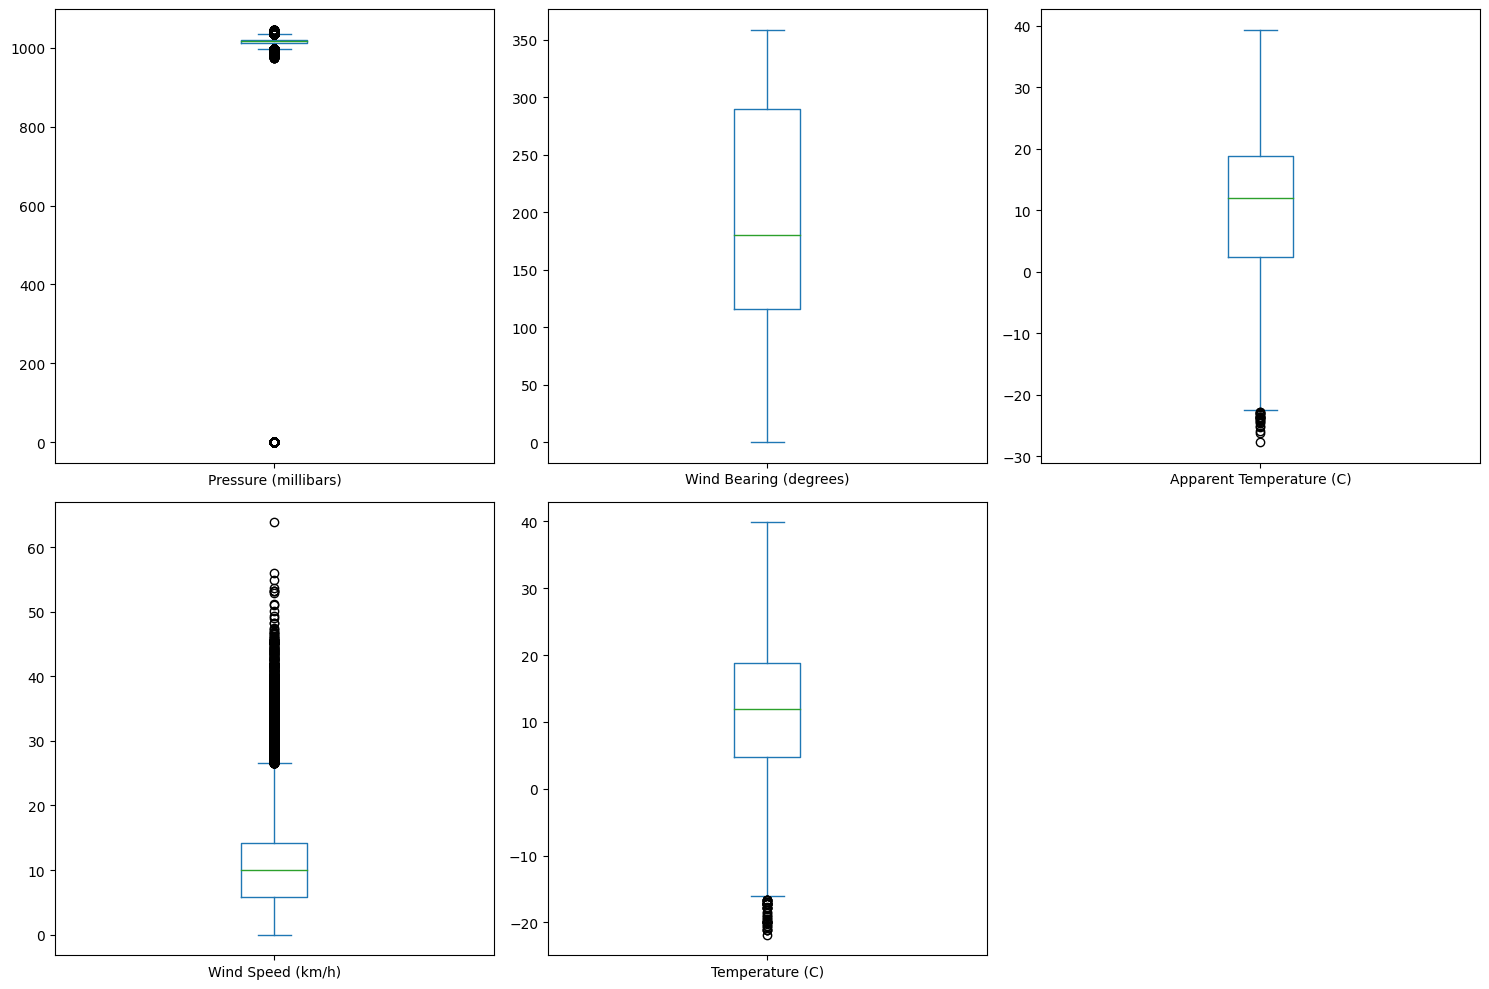

In [131]:
df[top_features_for_boxplot].plot(kind='box', subplots=True, layout=(2, 3), figsize=(15, 10))
plt.tight_layout()
plt.show()

# Завдання 3
Чи потрібно застосувати квантильний алгоритм для видалення викидів? Якщо так то застосуйте, інакше, що на вашу думку потрібно зробити?

In [132]:
numeric_df = df.select_dtypes(include=['number'])


In [133]:
def remove_outliers_iqr(df):
    Q1 = df.quantile(0.25)
    Q3 = df.quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    df_clean = df[~((df < lower_bound) | (df > upper_bound)).any(axis=1)]
    return df_clean

In [134]:
print(f"Кількість рядків до видалення викидів: {len(df)}")

Кількість рядків до видалення викидів: 96453


In [135]:
numeric_df_clean = remove_outliers_iqr(numeric_df)

In [136]:
df_clean = df.loc[numeric_df_clean.index]

In [137]:
print(df_clean.describe())

       Temperature (C)  Apparent Temperature (C)      Humidity  \
count     89265.000000              89265.000000  89265.000000   
mean         12.359793                 11.377613      0.734417   
std           9.454743                 10.546151      0.195884   
min         -16.111111                -21.922222      0.170000   
25%           5.000000                  2.955556      0.600000   
50%          12.288889                 12.288889      0.780000   
75%          19.005556                 19.005556      0.890000   
max          38.983333                 39.344444      1.000000   

       Wind Speed (km/h)  Wind Bearing (degrees)  Visibility (km)  \
count       89265.000000            89265.000000     89265.000000   
mean           10.146547              186.539002        10.457106   
std             5.834177              107.261587         4.171854   
min             0.000000                0.000000         0.000000   
25%             5.602800              113.000000         8.7

# Завдання 4
Намалюйте матрицю кореляцій. Для найбільш корельованих ознак намалюйте точкову діаграму

In [138]:
numeric_df = df.select_dtypes(include=['number'])

In [139]:
correlation_matrix = numeric_df.corr()

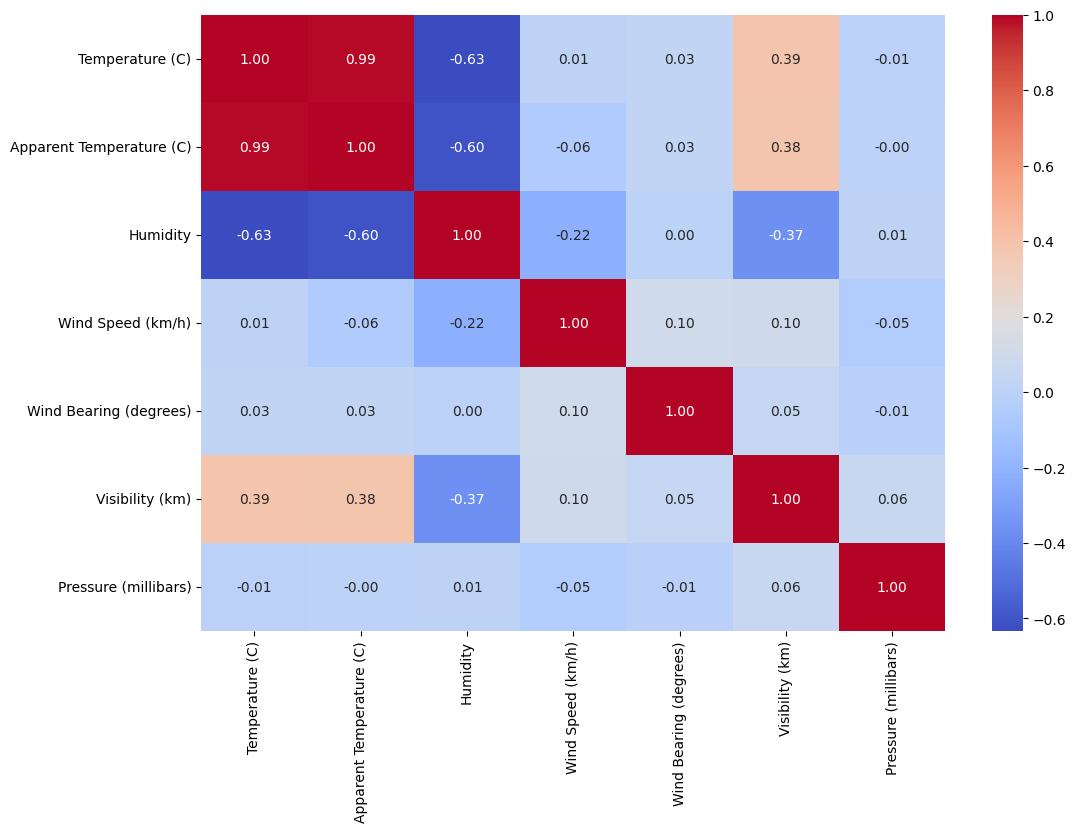

In [140]:
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title
plt.show()

In [141]:
correlation_matrix_unstacked = correlation_matrix.unstack()
sorted_correlations = correlation_matrix_unstacked.sort_values(kind="quicksort", ascending=False)

In [142]:
most_correlated_pair = sorted_correlations[1:2]
most_correlated_feature1 = most_correlated_pair.index[0][0]
most_correlated_feature2 = most_correlated_pair.index[0][1]

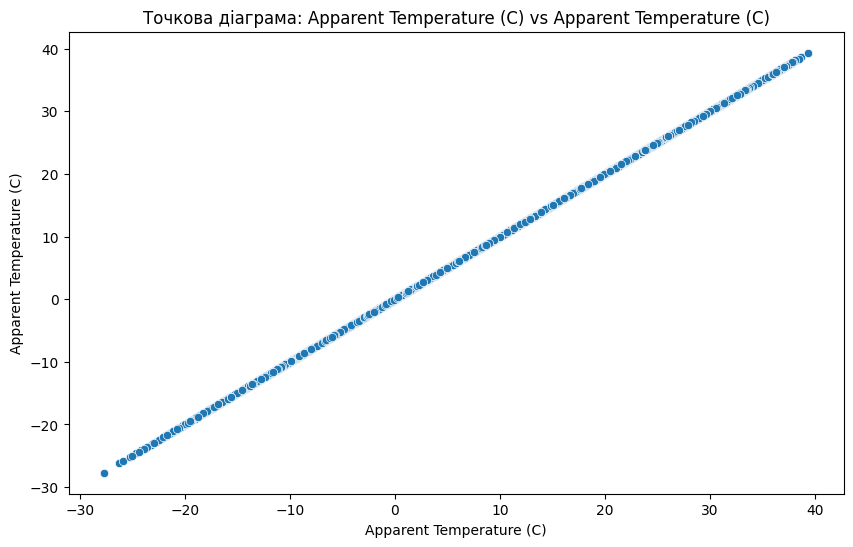

In [143]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x=numeric_df[most_correlated_feature1], y=numeric_df[most_correlated_feature2])
plt.title(f'Точкова діаграма: {most_correlated_feature1} vs {most_correlated_feature2}')
plt.xlabel(most_correlated_feature1)
plt.ylabel(most_correlated_feature2)
plt.show()

# Завдання 5
Виведіть характеристики для категоріальних ознак

In [144]:
categorical_df = df.select_dtypes(include=['object', 'category'])

In [145]:
for column in categorical_df.columns:
    print(f"Характеристики для ознаки '{column}':")
    print(categorical_df[column].describe())
    print("\nРозподіл значень:")
    print(categorical_df[column].value_counts())
    print("\n" + "-"*50 + "\n")

Характеристики для ознаки 'Formatted Date':
count                             96453
unique                            96429
top       2010-08-02 00:00:00.000 +0200
freq                                  2
Name: Formatted Date, dtype: object

Розподіл значень:
Formatted Date
2010-08-02 00:00:00.000 +0200    2
2010-08-02 12:00:00.000 +0200    2
2010-08-02 03:00:00.000 +0200    2
2010-08-02 04:00:00.000 +0200    2
2010-08-02 05:00:00.000 +0200    2
                                ..
2009-03-09 22:00:00.000 +0100    1
2009-03-09 21:00:00.000 +0100    1
2009-03-09 20:00:00.000 +0100    1
2009-03-09 19:00:00.000 +0100    1
2016-09-09 23:00:00.000 +0200    1
Name: count, Length: 96429, dtype: int64

--------------------------------------------------

Характеристики для ознаки 'Summary':
count             96453
unique               27
top       Partly Cloudy
freq              31733
Name: Summary, dtype: object

Розподіл значень:
Summary
Partly Cloudy                          31733
Mostly Cloudy

# Завдання 6
Виведіть групові ящики з вусами по одній(або декількох) категоріальних ознак. Що по них можна сказати?

In [149]:
print(df.columns)

Index(['Formatted Date', 'Summary', 'Precip Type', 'Temperature (C)',
       'Apparent Temperature (C)', 'Humidity', 'Wind Speed (km/h)',
       'Wind Bearing (degrees)', 'Visibility (km)', 'Pressure (millibars)',
       'Daily Summary'],
      dtype='object')


(array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
        18, 19, 20, 21, 22, 23, 24, 25, 26, 27]),
 [Text(1, 0, 'Breezy'),
  Text(2, 0, 'Breezy and Dry'),
  Text(3, 0, 'Breezy and Foggy'),
  Text(4, 0, 'Breezy and Mostly Cloudy'),
  Text(5, 0, 'Breezy and Overcast'),
  Text(6, 0, 'Breezy and Partly Cloudy'),
  Text(7, 0, 'Clear'),
  Text(8, 0, 'Dangerously Windy and Partly Cloudy'),
  Text(9, 0, 'Drizzle'),
  Text(10, 0, 'Dry'),
  Text(11, 0, 'Dry and Mostly Cloudy'),
  Text(12, 0, 'Dry and Partly Cloudy'),
  Text(13, 0, 'Foggy'),
  Text(14, 0, 'Humid and Mostly Cloudy'),
  Text(15, 0, 'Humid and Overcast'),
  Text(16, 0, 'Humid and Partly Cloudy'),
  Text(17, 0, 'Light Rain'),
  Text(18, 0, 'Mostly Cloudy'),
  Text(19, 0, 'Overcast'),
  Text(20, 0, 'Partly Cloudy'),
  Text(21, 0, 'Rain'),
  Text(22, 0, 'Windy'),
  Text(23, 0, 'Windy and Dry'),
  Text(24, 0, 'Windy and Foggy'),
  Text(25, 0, 'Windy and Mostly Cloudy'),
  Text(26, 0, 'Windy and Overcast'),
  T

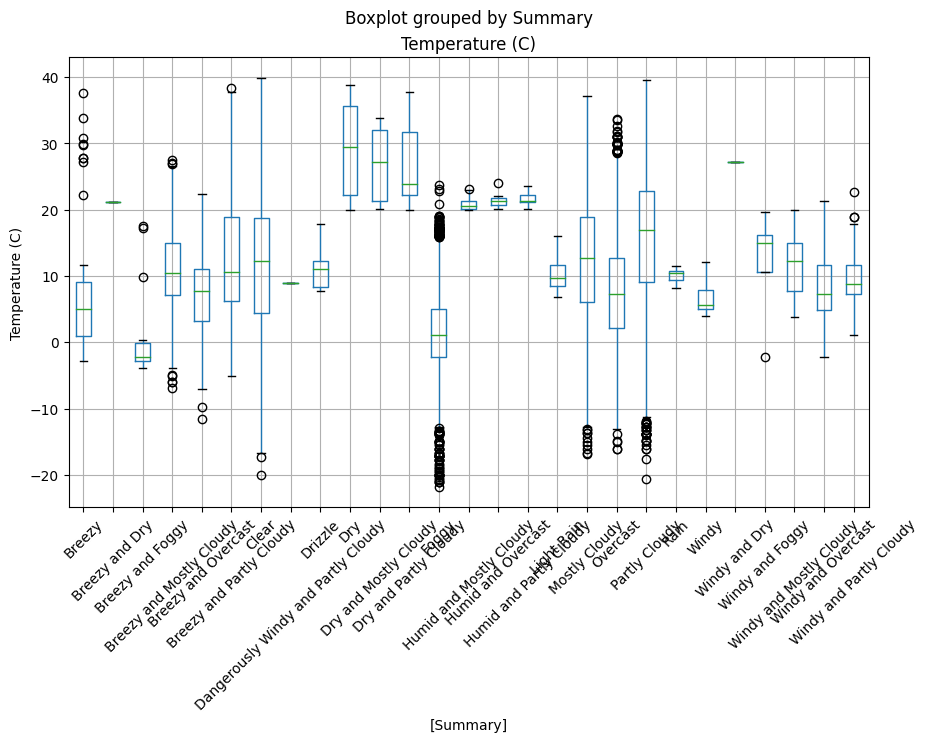

In [161]:
ax = df[['Summary', 'Temperature (C)']].boxplot(by='Summary', figsize=(10,6))
ax.set_ylabel('Temperature (C)')
plt.xticks(rotation=45)